<a href="https://colab.research.google.com/github/purnachand1186/Breast_Cancer_Analysis_ML/blob/main/Breast_Cancer_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**OVERVIEW**

In this application, I will explore Breast Cancer dataset from UC Irvine dataset ( https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic). The same dataset is avaialbe in Python SK-Learn module. The goal of this project is to perform EDA on the data , perform analysis and predict the malignant patients with the information provided.

**Dataset Information**

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.  They describe characteristics of the cell nuclei present in the image. A few of the images can be found at http://www.cs.wisc.edu/~street/images/

Separating plane described above was obtained using Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree Construction Via Linear Programming." Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], a classification method which uses linear programming to construct a decision tree.  Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes.

The actual linear program used to obtain the separating plane in the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/



**Attribute Information:**

1) ID number

2) Diagnosis (M (0) = malignant, B (1) = benign)
3-32)


Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)



Class distribution: 357 benign, 212 malignant

### Load Required Python Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#load data from sklearn
from sklearn.datasets import load_breast_cancer


from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report, roc_curve, auc, ConfusionMatrixDisplay

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


import warnings
warnings.filterwarnings('ignore')

In [2]:
#install kaledio for plotly graphs
!pip install kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.5 MB/s eta 0:00:00


In [3]:
import kaleido

### Data Understanding

Load the data and provide basic data analysis using Pandas.

In [5]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
cancer_df= pd.DataFrame(X,columns=cancer.feature_names)
cancer_df['target']=y
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
# no of rows and columns in data
print(f'Rows : {cancer_df.shape[0]} , Features:  {cancer_df.shape[1]}')

Rows : 569 , Features:  31


In [8]:
#describe data fram
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [9]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [11]:
#find the percentage of values in target column
tar_unique_vals = cancer_df['target'].value_counts(normalize=True)
tar_unique_vals

,proportion
target,
1,0.627417
0,0.372583


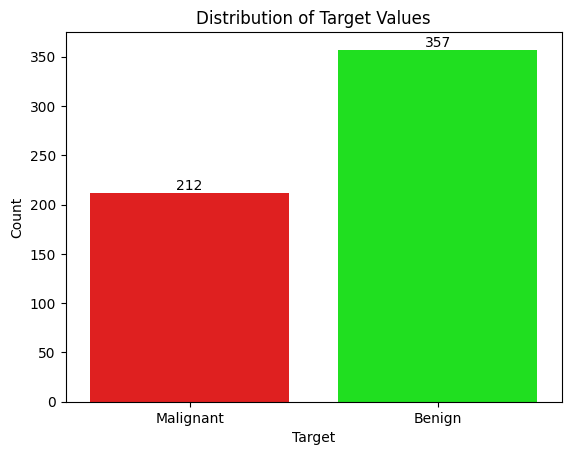

In [30]:
# draw distribution of target values benign, malignant

ax = sns.countplot(x='target', data=cancer_df, palette=["#FF0000", "#00FF00"])
for con in ax.containers:
    ax.bar_label(con)
plt.title('Distribution of Target Values')
plt.xlabel('Target')
plt.ylabel('Count')
ax.set_xticklabels(['Malignant', 'Benign'])
plt.savefig('sample_data/target_distribution.jpeg')
plt.show()

**From the above diagram, there are 212 number of Malignant cases, i.e. patients with breast cancer and 357 cases which do not have breast cancer, data is somewhat is unblanced, but good enough for our analysis**

In [28]:
#create a data frame with missing values and percentage of missing values for each column
def missing_df(df):
  total_missing_value = df.isnull().sum()
  percent_missing_value = round(total_missing_value*100/len(df),2)
  missing_valus_df = pd.DataFrame({'count': total_missing_value, 'percentage': percent_missing_value})
  return missing_valus_df

In [29]:
#show missing data in the datafram
missing_data = missing_df(cancer_df)
missing_data[missing_data['count']>0]

,count,percentage


In [31]:
# list of categorical columns
cat_cols = cancer_df.select_dtypes(include='object').columns.tolist()
cat_cols

[]

In [35]:
# data after group by target value
cancer_df.groupby('target').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
target,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


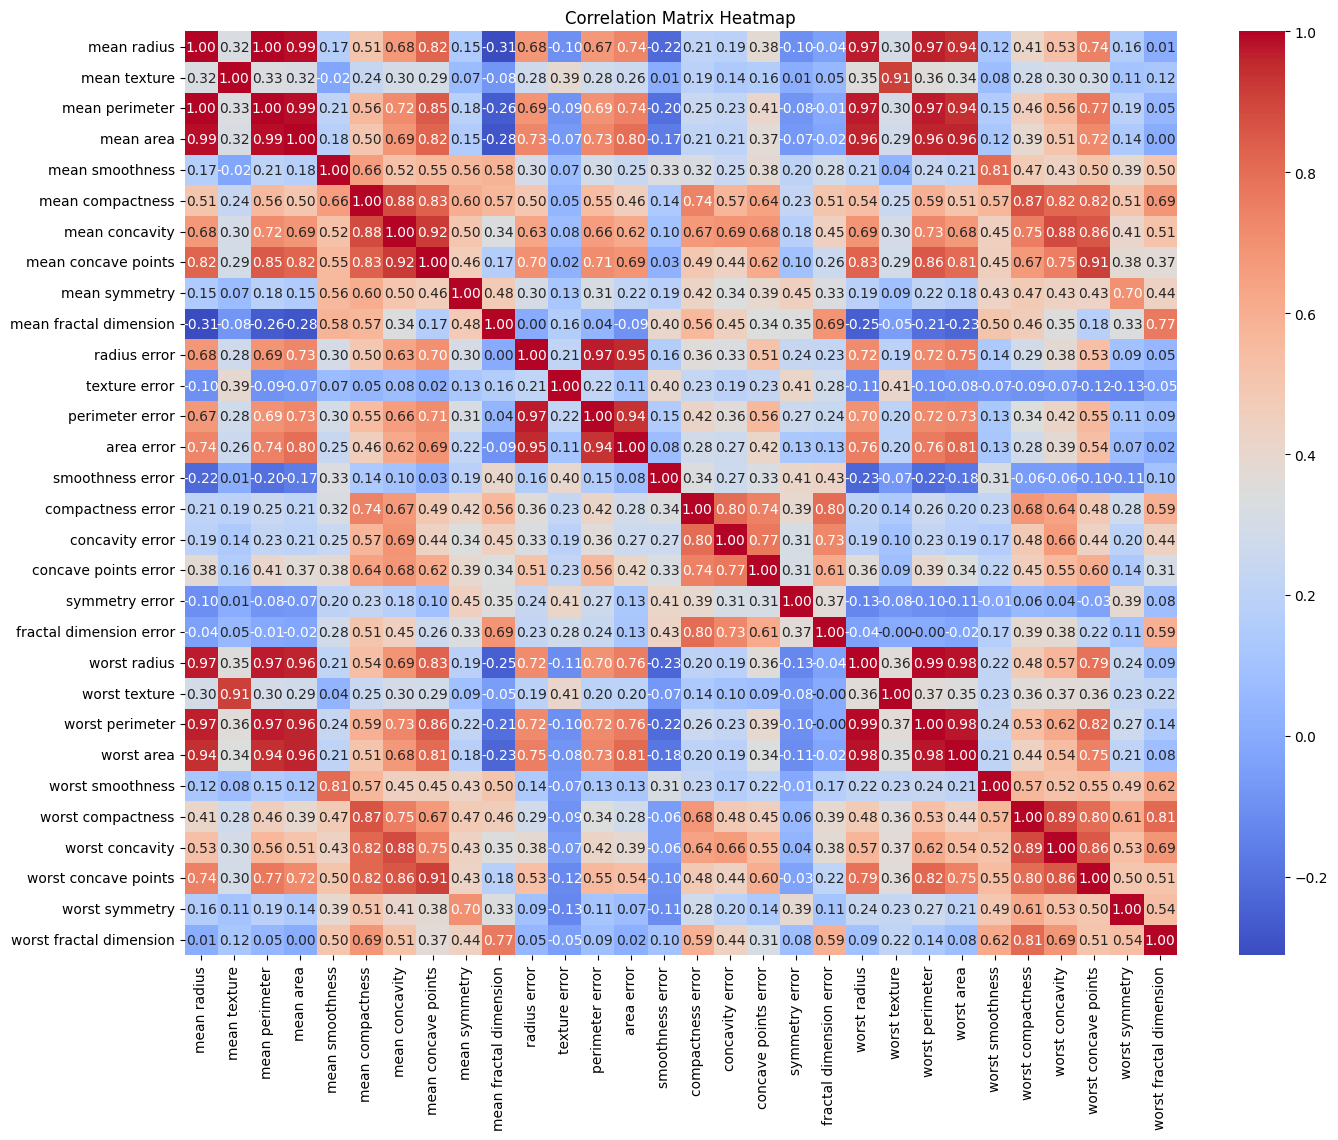

In [46]:
# Correlation heat map after dropping target column
plt.figure(figsize=(20,15))
sns.heatmap(cancer_df.drop(columns='target').corr(), cmap='coolwarm', fmt=".2f", annot=True)
plt.title('Correlation Matrix Heatmap')
plt.savefig('sample_data/heatmap.jpeg')
plt.show()

**Observations**

*Strong Positive Correlations*:
  

1.   'mean perimter' & 'mean radious' features has a string positive correlation (Same case with 'worst perimeter' & 'worst radious')
2.   'mean radious' & 'mean area' features also has a string positive correlation (Same case with 'worst radious' & 'worst area')
3.  'mean area' & 'mean radious'  features has a string positive correlation (Same case with 'worst area' & 'worst radious')
4. 'mean compactness' & 'mean concavity' features has a string positive correlation



*Medium Positive Correlations*:

1.  'mean concave point' & 'mean radious' features has a medium positive correlation
2. 'mean concave point' & 'mean Compactness' features has a medium positive correlation
3. 'mean texture' & 'mean radious' features has a medium positive correlation
4.  'mean texture' & 'mean area' features also has a medium positive




In [ ]:
# Draw Joint plots among the string correlated features
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
sns.jointplot(data=cancer_df, x='mean perimeter', y='mean radius', kind='scatter', ax=axes[0, 0])
sns.jointplot(data=cancer_df, x='mean perimeter', y='worst radius', kind='scatter', ax=axes[0, 1])
sns.jointplot(data=cancer_df, x='mean area', y='mean radius', kind='scatter', ax=axes[1, 0])
sns.jointplot(data=cancer_df, x='mean area', y='worst radius', kind='scatter', ax=axes[1, 1])
plt.tight_layout()
plt.show()

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.